**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [32]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [33]:
# Load Data
file_path = '/content/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [34]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [35]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [36]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [37]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [38]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

** Experiment with units**

In [11]:
model = Sequential()

# Increase the number of units in the LSTM layers to 100
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')


**Add more LSTM layers**



In [39]:
model = Sequential()

# Add more LSTM layers and keep the units to 50
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))

# Add another LSTM layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the final LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

**Change the dropout rate **

In [40]:
model = Sequential()

# Keep the original number of units but increase the dropout rate to 0.4
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.4))  # Increase dropout rate

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.4))  # Increase dropout rate

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

In [23]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.4967
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1445
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1448
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1248
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1090
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1217
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1116
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1065
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0990
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1018
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1010
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0994
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1016
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0934
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0971
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

**Experiment 1: Increase Epochs**


In [28]:
# Increase the number of epochs to allow the model more time to learn
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.4273
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1438
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1292
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1422
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1157
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1162
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.1086
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.1008
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1061
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.1165
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1019
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1159
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1033
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1002
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1096
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━

**Experiment 2: Decrease Epochs**

In [17]:
# Decrease the number of epochs to prevent overfitting
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0968
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0857
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0830
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0889
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0881
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0912
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0939
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0825
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0887
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0893


**Experiment 3: Increase Batch Size**

In [41]:
# Increase the batch size to process more samples at once, potentially speeding up training
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.5204
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2763
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1431
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2155
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1465
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1544
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1853
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1382
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1295
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1234
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1306
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1158
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1224
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1186
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1128
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━

In [42]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


In [43]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

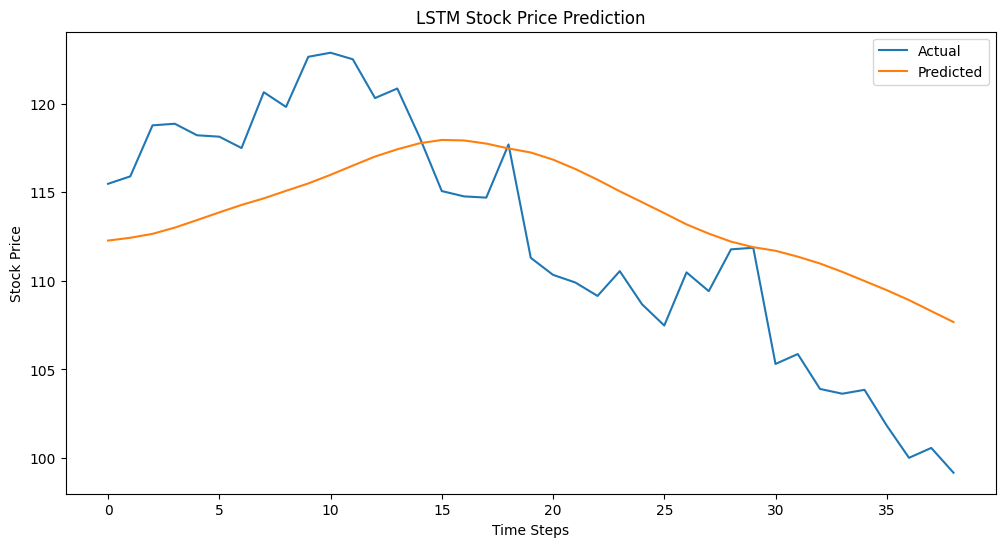

In [44]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
The purpose of normalizing the 'Close' prices before feeding them into the LSTM model is to scale the data to a smaller range, typically between 0 and 1, or -1 and 1. This is important because:

        **Improved Training Stability**: Normalized data ensures that the model trains more effectively, preventing large gradients that can cause issues like exploding or vanishing gradients during backpropagation.

        **Faster Convergence**: It helps the model converge faster by maintaining consistent scales of input data, making the learning process more efficient.

        **Better Performance**: LSTM models and other neural networks tend to perform better with normalized data, as it helps in generalizing well to unseen data.

2.	What is the purpose of the Dropout layer in the LSTM model?
The purpose of the Dropout layer in the LSTM model is to prevent overfitting during training by randomly setting a fraction of the input units to zero at each update during training. This has several benefits:

      **Regularization**: Dropout acts as a form of regularization, reducing the model's dependency on any specific neuron and forcing it to learn more robust features.

      **Improved Generalization**: By not relying on any single neuron, the model is encouraged to spread out learning, leading to better generalization to unseen data.

      **Reduced Overfitting**: It helps to prevent overfitting, especially in deep networks, by adding noise to the model, which can lead to a more generalized learning process.

3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?
If the predicted line closely follows the actual line in the plot showing actual vs predicted stock prices, it indicates that the model has learned to accurately predict the stock prices. Specifically:

    **High Accuracy**: The model's predictions are very close to the true values, suggesting that the model has captured the underlying patterns in the data effectively.

    **Good Fit: **A close match between the predicted and actual lines means the model is well-fitted to the data, making it reliable for making predictions.

    **Model Performance**: It shows that the model performs well in terms of its predictive power, meaning it can potentially be used for forecasting future stock prices with a reasonable level of confidence. However, caution should be exercised as past performance does not always guarantee future results.